In [8]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths


In [9]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Sediment Diffusivity Tests

Grounding Line plotting - Sediment Diffusivity = 0

In [10]:
gl_run_title_kdiff_0 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=0")
kdiff_0 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run1_kdiff0.0/DATA_Dictionary_2025_03_19__11_54_48.pkl.gz"
with gzip.open(kdiff_0, 'rb') as f:
    DATA_dict_kdiff_0 = pickle.load(f)

In [11]:
bed_dict = DATA_dict_kdiff_0['bed_dict']
base_dict = DATA_dict_kdiff_0['base_dict']
surf_dict= DATA_dict_kdiff_0 ['surf_dict']
sed_dict = DATA_dict_kdiff_0['sed_dict']
H_dict = DATA_dict_kdiff_0['H_dict']
us_dict = DATA_dict_kdiff_0['us_dict']
ub_dict = DATA_dict_kdiff_0['ub_dict']
Hs_dict = DATA_dict_kdiff_0['Hs_dict']
GL_dict = DATA_dict_kdiff_0['GL_dict']
Qs_dict = DATA_dict_kdiff_0['Qs_dict']

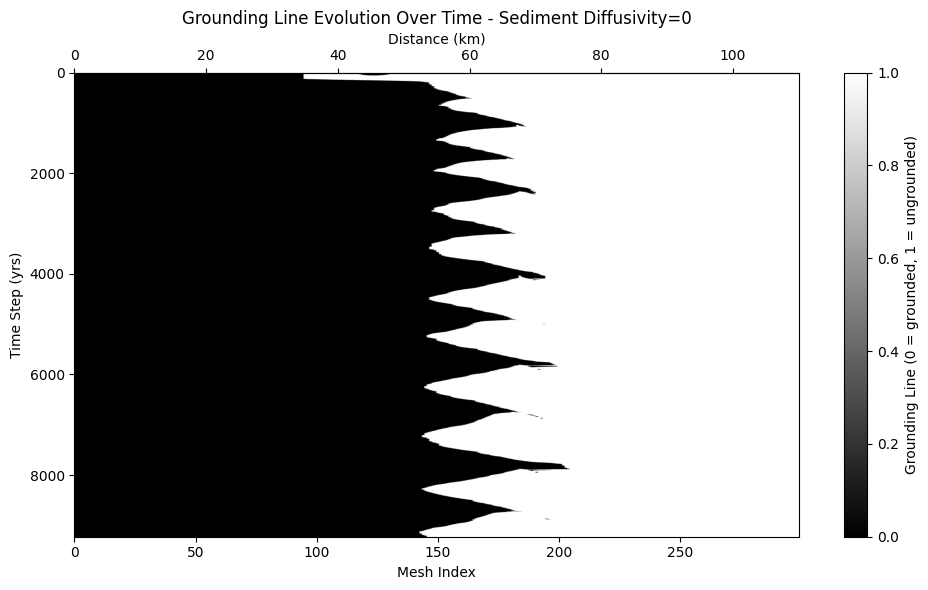

In [12]:
GL_dict = DATA_dict_kdiff_0['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_0)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [13]:
gl_positions_kdiff0 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff0.append(idx)

gl_positions_kdiff0 = np.array(gl_positions_kdiff0)
GL_km_kdiff0 = mesh_index_to_km(gl_positions_kdiff0)

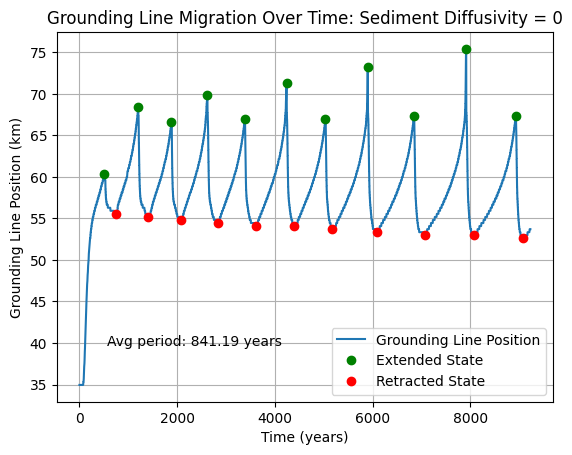

Mean cycle period: 841.19 years
[ 689.78742511  678.41759434  736.30215317  764.39967178  856.53416035
  792.68694736  869.48197673  942.54304937 1069.57302118 1012.14952093]
Mean advance amplitude: 68.53 km
[60.33444816 68.42809365 66.58862876 69.89966555 66.95652174 71.37123746
 66.95652174 73.21070234 67.32441472 75.4180602  67.32441472]
Mean retreat amplitude: 53.98 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 54.08026756
 53.71237458 53.34448161 52.97658863 52.97658863 52.60869565]


In [18]:
peaks_kdiff0, _ = find_peaks(GL_km_kdiff0, prominence=2) 
torughs_kdiff_0, _ = find_peaks(-GL_km_kdiff0, prominence=1)     
periods_kdiff0 = np.diff(np.array(time)[peaks_kdiff0])
adv_dists_kdiff0 = GL_km_kdiff0[peaks_kdiff0]
ret_dists__kdiff0 = GL_km_kdiff0[torughs_kdiff_0]


plt.plot(time, GL_km_kdiff0, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff0], GL_km_kdiff0[peaks_kdiff0], 'go', label='Extended State')
plt.plot(np.array(time)[torughs_kdiff_0], GL_km_kdiff0[torughs_kdiff_0], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff0):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 0")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff0):.2f} years")
print(periods_kdiff0)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff0):.2f} km")
print(adv_dists_kdiff0)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff0):.2f} km")
print(ret_dists__kdiff0)


Grounding Line plotting - Sediment Diffusivity = 5

In [22]:
gl_run_title_kdiff_5 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=5")
kdiff_5 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run2_kdiff5/DATA_Dictionary_2025_03_19__13_09_55.pkl.gz"
with gzip.open(kdiff_5, 'rb') as f:
    DATA_dict_kdiff_5 = pickle.load(f)

In [23]:
bed_dict = DATA_dict_kdiff_5['bed_dict']
base_dict = DATA_dict_kdiff_5['base_dict']
surf_dict= DATA_dict_kdiff_5 ['surf_dict']
sed_dict = DATA_dict_kdiff_5['sed_dict']
H_dict = DATA_dict_kdiff_5['H_dict']
us_dict = DATA_dict_kdiff_5['us_dict']
ub_dict = DATA_dict_kdiff_5['ub_dict']
Hs_dict = DATA_dict_kdiff_5['Hs_dict']
GL_dict = DATA_dict_kdiff_5['GL_dict']
Qs_dict = DATA_dict_kdiff_5['Qs_dict']

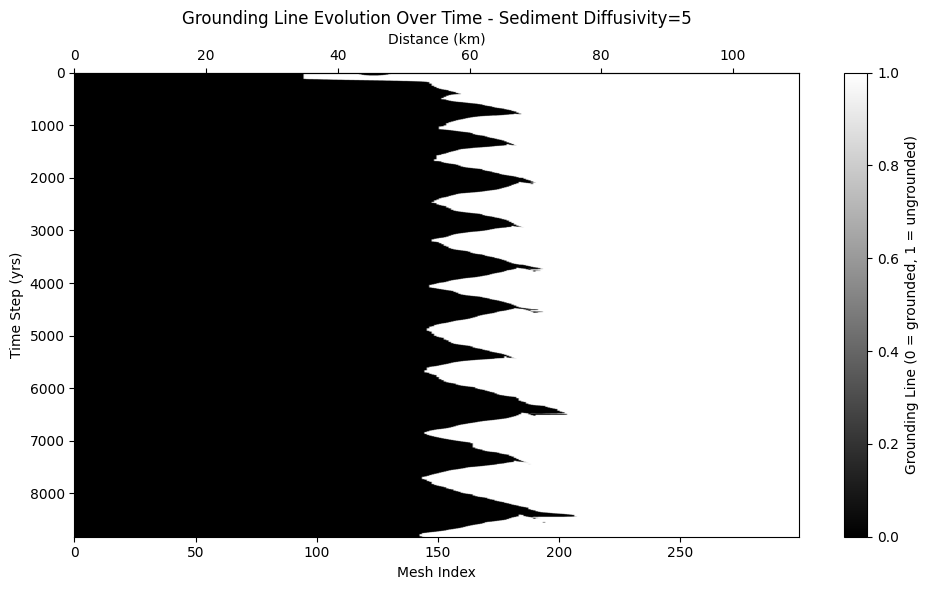

In [24]:
GL_dict = DATA_dict_kdiff_5['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_5)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [25]:
gl_positions_kdiff5 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff5.append(idx)

gl_positions_kdiff5 = np.array(gl_positions_kdiff5)
GL_km_kdiff5 = mesh_index_to_km(gl_positions_kdiff5)

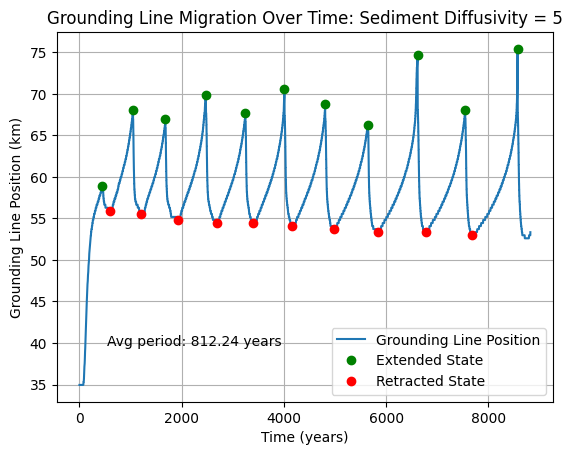

Mean cycle period: 812.24 years
[ 595.89475297  635.90063513  789.98085084  773.53904085  764.74777732
  796.24337621  832.80815852  975.7003709   930.0547974  1027.5527914 ]
Mean advance amplitude: 68.66 km
[58.86287625 68.06020067 66.95652174 69.89966555 67.69230769 70.63545151
 68.79598662 66.22073579 74.68227425 68.06020067 75.4180602 ]
Mean retreat amplitude: 54.26 km
[55.91973244 55.55183946 54.81605351 54.44816054 54.44816054 54.08026756
 53.71237458 53.34448161 53.34448161 52.97658863]


In [26]:
peaks_kdiff5, _ = find_peaks(GL_km_kdiff5, prominence=2) 
torughs_kdiff5, _ = find_peaks(-GL_km_kdiff5, prominence=1)     
periods_kdiff5 = np.diff(np.array(time)[peaks_kdiff5])
adv_dists_kdiff5 = GL_km_kdiff5[peaks_kdiff5]
ret_dists__kdiff5 = GL_km_kdiff5[torughs_kdiff5]


plt.plot(time, GL_km_kdiff5, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff5], GL_km_kdiff5[peaks_kdiff5], 'go', label='Extended State')
plt.plot(np.array(time)[torughs_kdiff5], GL_km_kdiff5[torughs_kdiff5], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff5):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 5")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff5):.2f} years")
print(periods_kdiff5)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff5):.2f} km")
print(adv_dists_kdiff5)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff5):.2f} km")
print(ret_dists__kdiff5)


Grounding Line plotting - Sediment Diffusivity = 10

In [28]:
gl_run_title_kdiff_10 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=10")
kdiff_10 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run3_kdiff10/DATA_Dictionary_2025_03_19__15_40_40.pkl.gz"
with gzip.open(kdiff_10, 'rb') as f:
    DATA_dict_kdiff_10 = pickle.load(f)

In [29]:
bed_dict = DATA_dict_kdiff_10['bed_dict']
base_dict = DATA_dict_kdiff_10['base_dict']
surf_dict= DATA_dict_kdiff_10 ['surf_dict']
sed_dict = DATA_dict_kdiff_10['sed_dict']
H_dict = DATA_dict_kdiff_10['H_dict']
us_dict = DATA_dict_kdiff_10['us_dict']
ub_dict = DATA_dict_kdiff_10['ub_dict']
Hs_dict = DATA_dict_kdiff_10['Hs_dict']
GL_dict = DATA_dict_kdiff_10['GL_dict']
Qs_dict = DATA_dict_kdiff_10['Qs_dict']

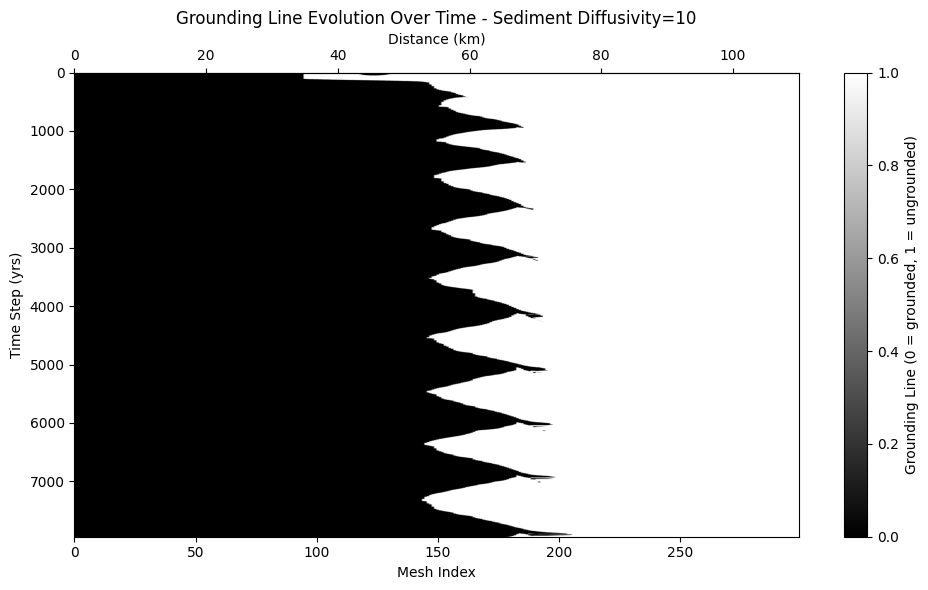

In [30]:
GL_dict = DATA_dict_kdiff_10['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_10)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [31]:
gl_positions_kdiff10 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff10.append(idx)

gl_positions_kdiff10 = np.array(gl_positions_kdiff10)
GL_km_kdiff10 = mesh_index_to_km(gl_positions_kdiff10)

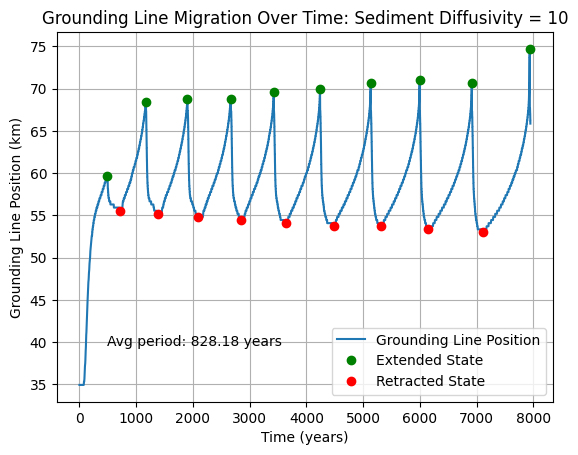

Mean cycle period: 828.18 years
[ 686.933691    733.4695348   763.59295655  756.85803403  815.82584372
  893.77112124  863.06971588  918.97237082 1021.11487082]
Mean advance amplitude: 69.20 km
[59.59866221 68.42809365 68.79598662 68.79598662 69.53177258 69.89966555
 70.63545151 71.00334448 70.63545151 74.68227425]
Mean retreat amplitude: 54.20 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.71237458 53.34448161 52.97658863]


In [32]:
peaks_kdiff10, _ = find_peaks(GL_km_kdiff10, prominence=2) 
torughs_kdiff10, _ = find_peaks(-GL_km_kdiff10, prominence=1)     
periods_kdiff10 = np.diff(np.array(time)[peaks_kdiff10])
adv_dists_kdiff10 = GL_km_kdiff10[peaks_kdiff10]
ret_dists__kdiff10 = GL_km_kdiff10[torughs_kdiff10]


plt.plot(time, GL_km_kdiff10, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff10], GL_km_kdiff10[peaks_kdiff10], 'go', label='Extended State')
plt.plot(np.array(time)[torughs_kdiff10], GL_km_kdiff10[torughs_kdiff10], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff10):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 10")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff10):.2f} years")
print(periods_kdiff10)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff10):.2f} km")
print(adv_dists_kdiff10)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff10):.2f} km")
print(ret_dists__kdiff10)


Grounding Line plotting - Sediment Diffusivity = 15

In [33]:
gl_run_title_kdiff_15 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=15")
kdiff_15 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run4_kdiff15/DATA_Dictionary_2025_03_19__16_57_19.pkl.gz"
with gzip.open(kdiff_15, 'rb') as f:
    DATA_dict_kdiff_15 = pickle.load(f)

In [34]:
bed_dict = DATA_dict_kdiff_15['bed_dict']
base_dict = DATA_dict_kdiff_15['base_dict']
surf_dict= DATA_dict_kdiff_15 ['surf_dict']
sed_dict = DATA_dict_kdiff_15['sed_dict']
H_dict = DATA_dict_kdiff_15['H_dict']
us_dict = DATA_dict_kdiff_15['us_dict']
ub_dict = DATA_dict_kdiff_15['ub_dict']
Hs_dict = DATA_dict_kdiff_15['Hs_dict']
GL_dict = DATA_dict_kdiff_15['GL_dict']
Qs_dict = DATA_dict_kdiff_15['Qs_dict']

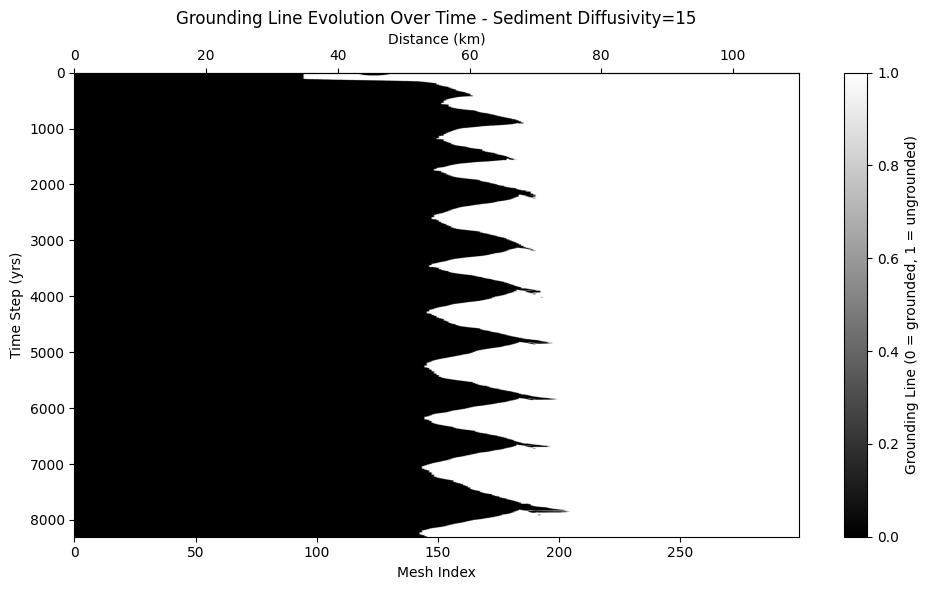

In [35]:
GL_dict = DATA_dict_kdiff_15['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_15)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [36]:
gl_positions_kdiff15 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff15.append(idx)

gl_positions_kdiff15 = np.array(gl_positions_kdiff15)
GL_km_kdiff15 = mesh_index_to_km(gl_positions_kdiff15)

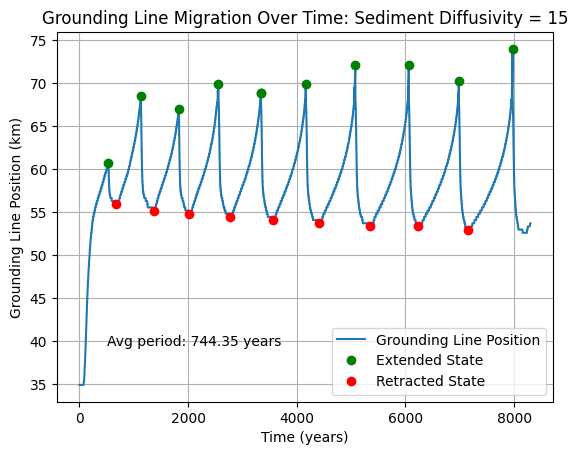

Mean cycle period: 744.35 years
[601.225097   695.84666083 731.07000583 778.29785058   3.95101317
 827.50846047 911.17149888 983.90776024 921.34016703 989.21591041]
Mean advance amplitude: 69.26 km
[60.70234114 68.42809365 66.95652174 69.89966555 68.79598662 68.79598662
 69.89966555 72.10702341 72.10702341 70.26755853 73.94648829]
Mean retreat amplitude: 54.20 km
[55.91973244 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863]


In [38]:
peaks_kdiff15, _ = find_peaks(GL_km_kdiff15, prominence=2) 
torughs_kdiff15, _ = find_peaks(-GL_km_kdiff15, prominence=3)     
periods_kdiff15 = np.diff(np.array(time)[peaks_kdiff15])
adv_dists_kdiff15 = GL_km_kdiff15[peaks_kdiff15]
ret_dists__kdiff15 = GL_km_kdiff15[torughs_kdiff15]


plt.plot(time, GL_km_kdiff15, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff15], GL_km_kdiff15[peaks_kdiff15], 'go', label='Extended State')
plt.plot(np.array(time)[torughs_kdiff15], GL_km_kdiff15[torughs_kdiff15], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff15):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 15")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff15):.2f} years")
print(periods_kdiff15)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff15):.2f} km")
print(adv_dists_kdiff15)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff15):.2f} km")
print(ret_dists__kdiff15)


Grounding Line plotting - Sediment Diffusivity = 20

In [45]:
gl_run_title_kdiff_20 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=20")
kdiff_20 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run5_kdiff20/DATA_Dictionary_2025_03_20__13_56_10.pkl.gz"
with gzip.open(kdiff_20, 'rb') as f:
    DATA_dict_kdiff_20 = pickle.load(f)

In [46]:
bed_dict = DATA_dict_kdiff_20['bed_dict']
base_dict = DATA_dict_kdiff_20['base_dict']
surf_dict= DATA_dict_kdiff_20 ['surf_dict']
sed_dict = DATA_dict_kdiff_20['sed_dict']
H_dict = DATA_dict_kdiff_20['H_dict']
us_dict = DATA_dict_kdiff_20['us_dict']
ub_dict = DATA_dict_kdiff_20['ub_dict']
Hs_dict = DATA_dict_kdiff_20['Hs_dict']
GL_dict = DATA_dict_kdiff_20['GL_dict']
Qs_dict = DATA_dict_kdiff_20['Qs_dict']

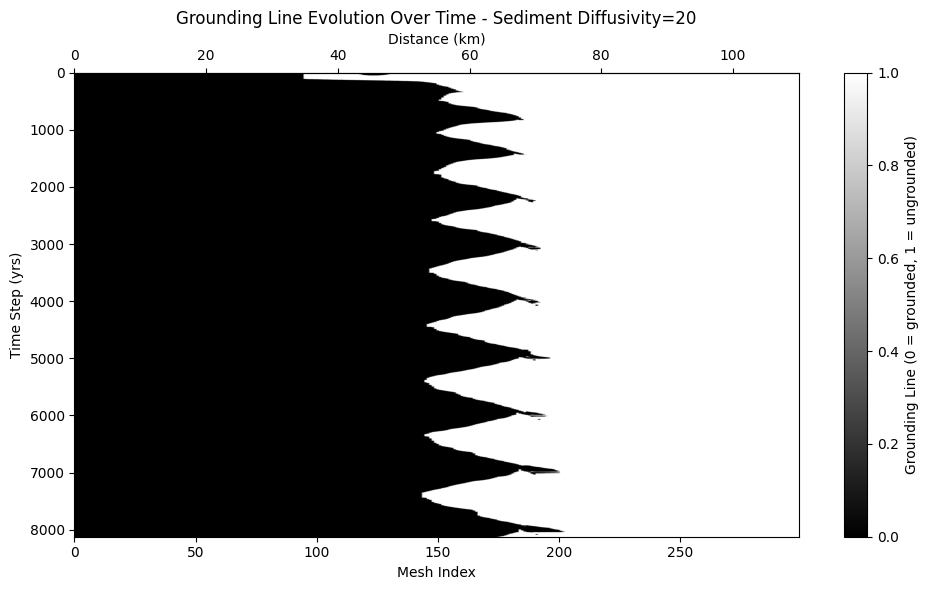

In [47]:
GL_dict = DATA_dict_kdiff_20['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_20)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [48]:
gl_positions_kdiff20 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff20.append(idx)

gl_positions_kdiff20 = np.array(gl_positions_kdiff20)
GL_km_kdiff20 = mesh_index_to_km(gl_positions_kdiff20)

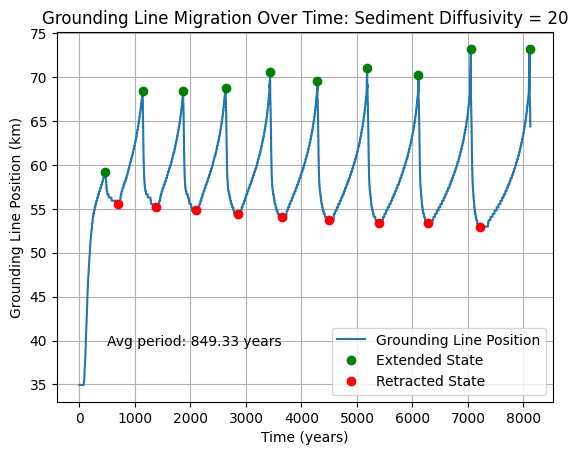

Mean cycle period: 849.33 years
[ 671.04104519  731.17664818  765.35723967  801.83053734  850.85569445
  897.86178343  923.5788195   943.37435896 1058.89407233]
Mean advance amplitude: 69.27 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 71.00334448 70.26755853 73.21070234 73.21070234]
Mean retreat amplitude: 54.16 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863]


In [49]:
peaks_kdiff20, _ = find_peaks(GL_km_kdiff20, prominence=2) 
torughs_kdiff20, _ = find_peaks(-GL_km_kdiff20, prominence=3)     
periods_kdiff20 = np.diff(np.array(time)[peaks_kdiff20])
adv_dists_kdiff20 = GL_km_kdiff20[peaks_kdiff20]
ret_dists__kdiff20 = GL_km_kdiff20[torughs_kdiff20]


plt.plot(time, GL_km_kdiff20, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff20], GL_km_kdiff20[peaks_kdiff20], 'go', label='Extended State')
plt.plot(np.array(time)[torughs_kdiff20], GL_km_kdiff20[torughs_kdiff20], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff20):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 20")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff20):.2f} years")
print(periods_kdiff20)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff20):.2f} km")
print(adv_dists_kdiff20)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff20):.2f} km")
print(ret_dists__kdiff20)


Grounding Line plotting - Sediment Diffusivity = 25

In [51]:
gl_run_title_kdiff_25 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=25")
kdiff_25 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run6_kdiff25/DATA_Dictionary_2025_03_20__16_58_40.pkl.gz"
with gzip.open(kdiff_25, 'rb') as f:
    DATA_dict_kdiff_25 = pickle.load(f)

In [52]:
bed_dict = DATA_dict_kdiff_25['bed_dict']
base_dict = DATA_dict_kdiff_25['base_dict']
surf_dict= DATA_dict_kdiff_25 ['surf_dict']
sed_dict = DATA_dict_kdiff_25['sed_dict']
H_dict = DATA_dict_kdiff_25['H_dict']
us_dict = DATA_dict_kdiff_25['us_dict']
ub_dict = DATA_dict_kdiff_25['ub_dict']
Hs_dict = DATA_dict_kdiff_25['Hs_dict']
GL_dict = DATA_dict_kdiff_25['GL_dict']
Qs_dict = DATA_dict_kdiff_25['Qs_dict']

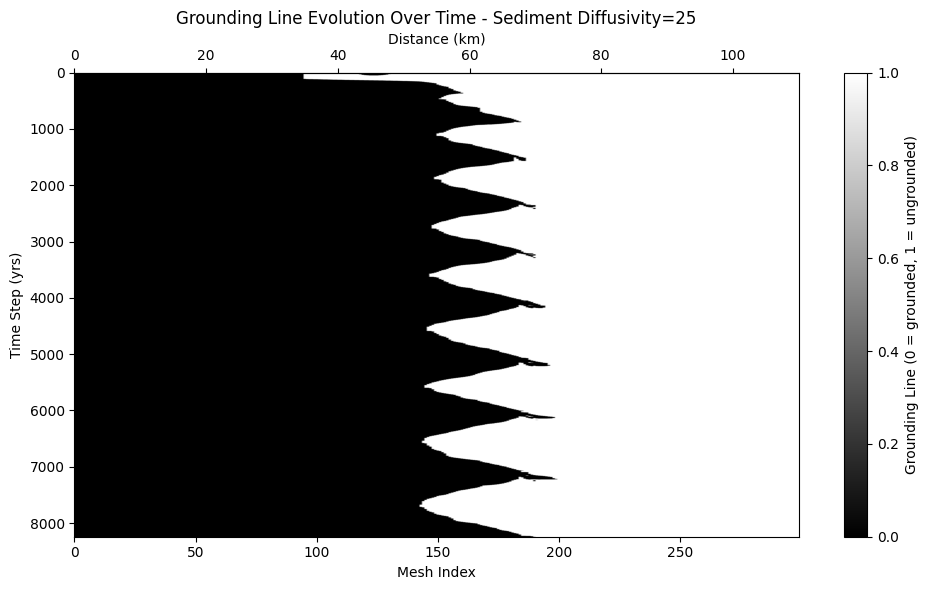

In [53]:
GL_dict = DATA_dict_kdiff_25['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_25)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [54]:
gl_positions_kdiff25 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff25.append(idx)

gl_positions_kdiff25 = np.array(gl_positions_kdiff25)
GL_km_kdiff25 = mesh_index_to_km(gl_positions_kdiff25)

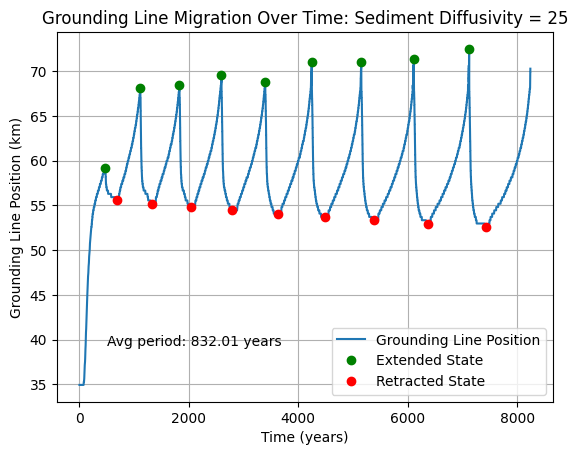

Mean cycle period: 832.01 years
[ 644.40981571  716.50182253  767.54739554  799.51642486  850.43049433
  905.15631101  959.74237038 1012.80121668]
Mean advance amplitude: 68.88 km
[59.23076923 68.06020067 68.42809365 69.53177258 68.79598662 71.00334448
 71.00334448 71.37123746 72.47491639]
Mean retreat amplitude: 54.08 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.60869565]


In [55]:
peaks_kdiff25, _ = find_peaks(GL_km_kdiff25, prominence=2) 
torughs_kdiff25, _ = find_peaks(-GL_km_kdiff25, prominence=3)     
periods_kdiff25 = np.diff(np.array(time)[peaks_kdiff25])
adv_dists_kdiff25 = GL_km_kdiff25[peaks_kdiff25]
ret_dists__kdiff25 = GL_km_kdiff25[torughs_kdiff25]


plt.plot(time, GL_km_kdiff25, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff25], GL_km_kdiff25[peaks_kdiff25], 'go', label='Extended State')
plt.plot(np.array(time)[torughs_kdiff25], GL_km_kdiff25[torughs_kdiff25], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff25):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 25")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff25):.2f} years")
print(periods_kdiff25)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff25):.2f} km")
print(adv_dists_kdiff25)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff25):.2f} km")
print(ret_dists__kdiff25)


Grounding Line plotting - Sediment Diffusivity = 30

In [56]:
gl_run_title_kdiff_30 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=30")
kdiff_30 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run7_kdiff30/DATA_Dictionary_2025_03_23__14_51_36.pkl.gz"
with gzip.open(kdiff_30, 'rb') as f:
    DATA_dict_kdiff_30 = pickle.load(f)

In [57]:
bed_dict = DATA_dict_kdiff_30['bed_dict']
base_dict = DATA_dict_kdiff_30['base_dict']
surf_dict= DATA_dict_kdiff_30 ['surf_dict']
sed_dict = DATA_dict_kdiff_30['sed_dict']
H_dict = DATA_dict_kdiff_30['H_dict']
us_dict = DATA_dict_kdiff_30['us_dict']
ub_dict = DATA_dict_kdiff_30['ub_dict']
Hs_dict = DATA_dict_kdiff_30['Hs_dict']
GL_dict = DATA_dict_kdiff_30['GL_dict']
Qs_dict = DATA_dict_kdiff_30['Qs_dict']

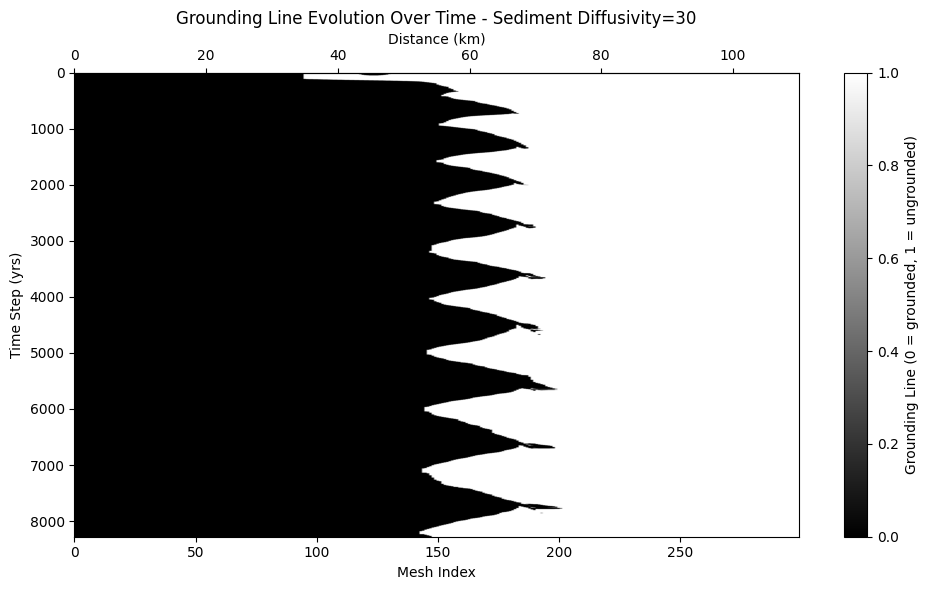

In [58]:
GL_dict = DATA_dict_kdiff_30['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_30)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [59]:
gl_positions_kdiff30 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_kdiff30.append(idx)

gl_positions_kdiff30 = np.array(gl_positions_kdiff30)
GL_km_kdiff30 = mesh_index_to_km(gl_positions_kdiff30)

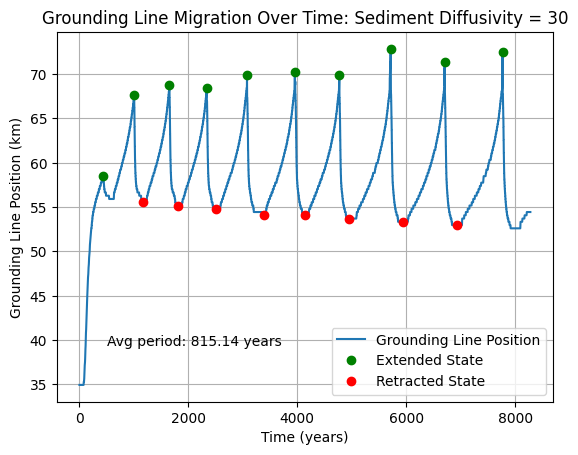

Mean cycle period: 815.14 years
[ 570.76874848  646.93348055  686.21370516  739.79627579  879.35435831
  815.0788936   943.68103752  990.44579913 1063.98887539]
Mean advance amplitude: 69.02 km
[58.49498328 67.69230769 68.79598662 68.42809365 69.89966555 70.26755853
 69.89966555 72.84280936 71.37123746 72.47491639]
Mean retreat amplitude: 54.22 km
[55.55183946 55.18394649 54.81605351 54.08026756 54.08026756 53.71237458
 53.34448161 52.97658863]


In [60]:
peaks_kdiff30, _ = find_peaks(GL_km_kdiff30, prominence=2) 
torughs_kdiff30, _ = find_peaks(-GL_km_kdiff30, prominence=3)     
periods_kdiff30 = np.diff(np.array(time)[peaks_kdiff30])
adv_dists_kdiff30 = GL_km_kdiff30[peaks_kdiff30]
ret_dists__kdiff30 = GL_km_kdiff30[torughs_kdiff30]


plt.plot(time, GL_km_kdiff30, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_kdiff30], GL_km_kdiff30[peaks_kdiff30], 'go', label='Extended State')
plt.plot(np.array(time)[torughs_kdiff30], GL_km_kdiff30[torughs_kdiff30], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_kdiff30):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Sediment Diffusivity = 30")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_kdiff30):.2f} years")
print(periods_kdiff30)

print(f"Mean advance amplitude: {np.mean(adv_dists_kdiff30):.2f} km")
print(adv_dists_kdiff30)

print(f"Mean retreat amplitude: {np.mean(ret_dists__kdiff30):.2f} km")
print(ret_dists__kdiff30)


Grounding Line plotting - Sediment Diffusivity = 50

In [ ]:
gl_run_title_kdiff_50 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=50")
kdiff_50 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run11_kdiff50/DATA_Dictionary_2025_03_23__16_19_54.pkl.gz"
with gzip.open(kdiff_50, 'rb') as f:
    DATA_dict_kdiff_50 = pickle.load(f)

In [ ]:
bed_dict = DATA_dict_kdiff_50['bed_dict']
base_dict = DATA_dict_kdiff_50['base_dict']
surf_dict= DATA_dict_kdiff_50 ['surf_dict']
sed_dict = DATA_dict_kdiff_50['sed_dict']
H_dict = DATA_dict_kdiff_50['H_dict']
us_dict = DATA_dict_kdiff_50['us_dict']
ub_dict = DATA_dict_kdiff_50['ub_dict']
Hs_dict = DATA_dict_kdiff_50['Hs_dict']
GL_dict = DATA_dict_kdiff_50['GL_dict']
Qs_dict = DATA_dict_kdiff_50['Qs_dict']

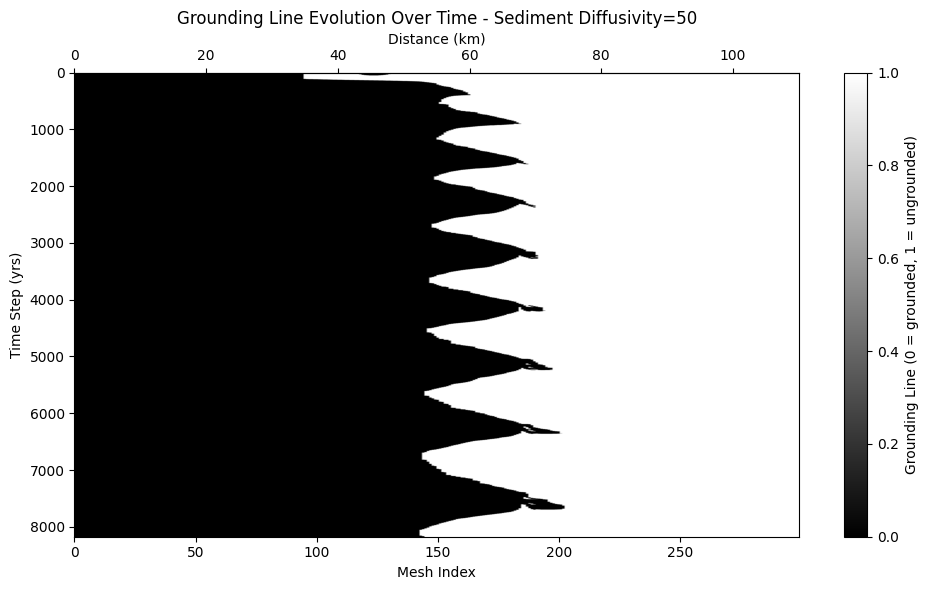

In [ ]:
GL_dict = DATA_dict_kdiff_50['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_50)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 75

In [ ]:
gl_run_title_kdiff_75 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=75")
kdiff_75 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run16_kdiff75/DATA_Dictionary_2025_03_23__18_05_40.pkl.gz"
with gzip.open(kdiff_75, 'rb') as f:
    DATA_dict_kdiff_75 = pickle.load(f)

In [ ]:
bed_dict = DATA_dict_kdiff_75['bed_dict']
base_dict = DATA_dict_kdiff_75['base_dict']
surf_dict= DATA_dict_kdiff_75 ['surf_dict']
sed_dict = DATA_dict_kdiff_75['sed_dict']
H_dict = DATA_dict_kdiff_75['H_dict']
us_dict = DATA_dict_kdiff_75['us_dict']
ub_dict = DATA_dict_kdiff_75['ub_dict']
Hs_dict = DATA_dict_kdiff_75['Hs_dict']
GL_dict = DATA_dict_kdiff_75['GL_dict']
Qs_dict = DATA_dict_kdiff_75['Qs_dict']

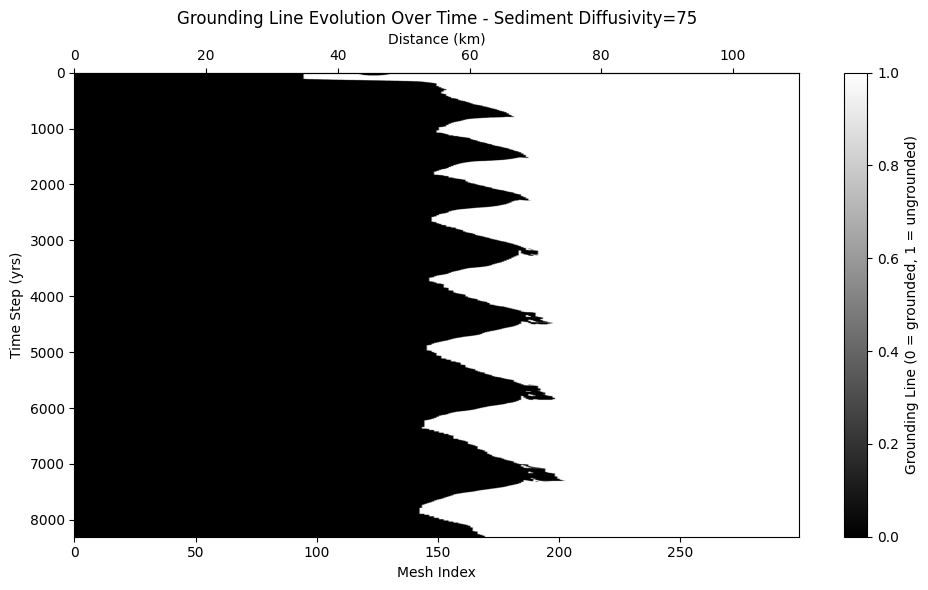

In [ ]:
GL_dict = DATA_dict_kdiff_75['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_75)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 100

In [ ]:
gl_run_title_kdiff_100 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=100")
kdiff_100 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run21_kdiff100/DATA_Dictionary_2025_03_23__20_07_19.pkl.gz"
with gzip.open(kdiff_100, 'rb') as f:
    DATA_dict_kdiff_100 = pickle.load(f)

In [ ]:
bed_dict = DATA_dict_kdiff_100['bed_dict']
base_dict = DATA_dict_kdiff_100['base_dict']
surf_dict= DATA_dict_kdiff_100 ['surf_dict']
sed_dict = DATA_dict_kdiff_100['sed_dict']
H_dict = DATA_dict_kdiff_100['H_dict']
us_dict = DATA_dict_kdiff_100['us_dict']
ub_dict = DATA_dict_kdiff_100['ub_dict']
Hs_dict = DATA_dict_kdiff_100['Hs_dict']
GL_dict = DATA_dict_kdiff_100['GL_dict']
Qs_dict = DATA_dict_kdiff_100['Qs_dict']

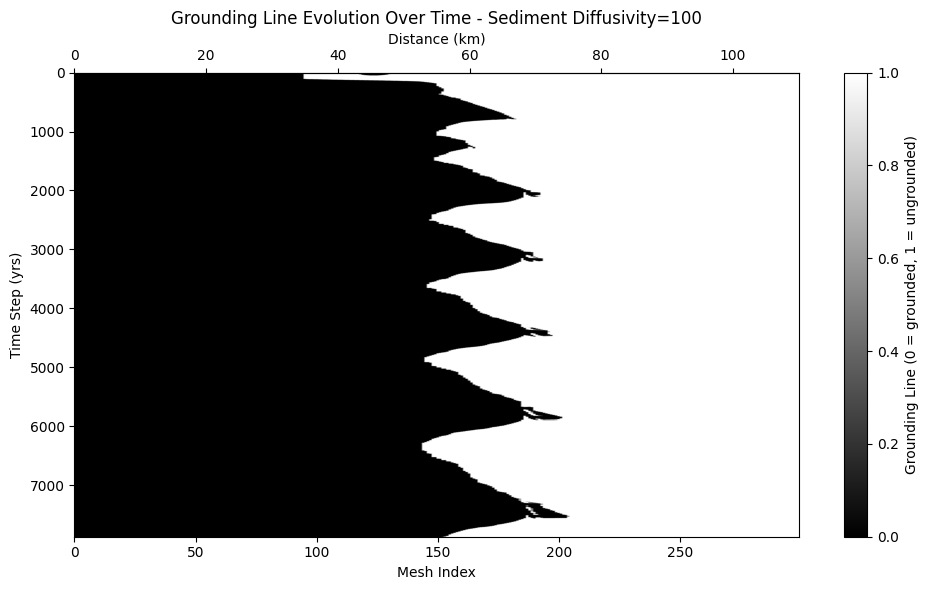

In [ ]:
GL_dict = DATA_dict_kdiff_100['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_100)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

Grounding Line plotting - Sediment Diffusivity = 150

In [ ]:
gl_run_title_kdiff_150 = str("Grounding Line Evolution Over Time - Sediment Diffusivity=150")
kdiff_150 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/kdiffTests/Run31_kdiff150/DATA_Dictionary_2025_03_23__23_39_52.pkl.gz"
with gzip.open(kdiff_150, 'rb') as f:
    DATA_dict_kdiff_150 = pickle.load(f)

In [ ]:
bed_dict = DATA_dict_kdiff_150['bed_dict']
base_dict = DATA_dict_kdiff_150['base_dict']
surf_dict= DATA_dict_kdiff_150 ['surf_dict']
sed_dict = DATA_dict_kdiff_150['sed_dict']
H_dict = DATA_dict_kdiff_150['H_dict']
us_dict = DATA_dict_kdiff_150['us_dict']
ub_dict = DATA_dict_kdiff_150['ub_dict']
Hs_dict = DATA_dict_kdiff_150['Hs_dict']
GL_dict = DATA_dict_kdiff_150['GL_dict']
Qs_dict = DATA_dict_kdiff_150['Qs_dict']

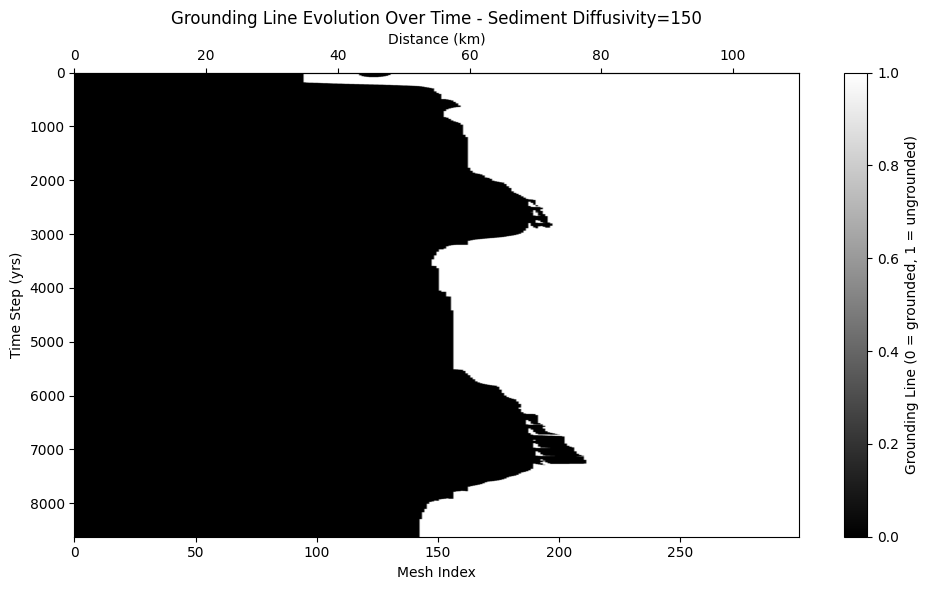

In [ ]:
GL_dict = DATA_dict_kdiff_150['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_kdiff_150)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [ ]:
## Sediment Diffusivity ##
title_kdiff_cycles = str("Number of Cycles Produced VS Sediment Diffusivity ")
KDIFFs = np.array([0, 5, 10, 15, 20, 25, 30, 50, 75, 100])
KDIFF_cycles = np.array([10, 11, 10, 10, 10, 10, 10, 9, 8, 8])
KDIFF_coeff = np.polyfit(KDIFFs,KDIFF_cycles, 1)
p_KDIFF = np.poly1d(KDIFF_coeff)
KDIFF_y_trend = p_KDIFF(KDIFFs)
R_2_KDIFF =r2_score(KDIFF_cycles,p_KDIFF(KDIFFs))


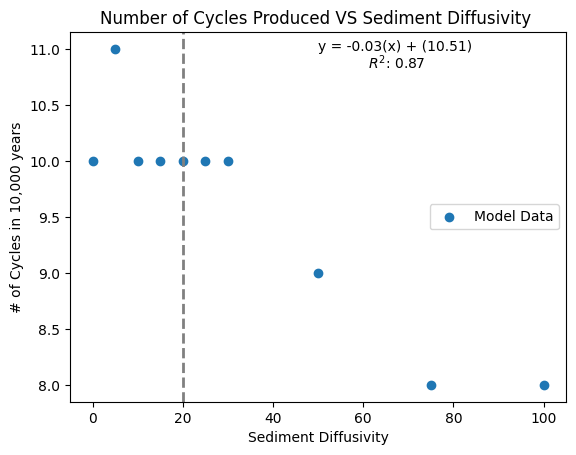

In [ ]:
plt.scatter(KDIFFs, KDIFF_cycles, label = 'Model Data')
plt.title(title_kdiff_cycles)
# plt.plot(KDIFFs, KDIFF_y_trend, color='red', label='Trendline')
plt.text(0.6, 0.9, f'$R^2$: {R_2_KDIFF:.2f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.95, f'y = {KDIFF_coeff[0]:.2f}(x) + ({KDIFF_coeff[1]:.2f})', transform=plt.gca().transAxes)
plt.axvline(x=20, color='gray', linestyle='--', linewidth=2)
plt.xlabel("Sediment Diffusivity")
plt.ylabel("# of Cycles in 10,000 years")
# plt.xticks(np.arange(0, 2, 0.2))
plt.legend()
